# Predicting Employee will leave the company or not?

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wng
wng.filterwarnings('ignore')

In [431]:
df=pd.read_csv("C:\PujaFiles\Excel data for practice\HR Python\HREmployeeAttrition.csv")
pd.set_option('display.max_columns',None) # To display all columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [432]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [433]:
df.shape

(1470, 34)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [435]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [436]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [437]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [438]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

# Top 3 Job Role with highest Salary and Department


In [439]:
df.nlargest(3,'MonthlyIncome').reset_index() [['MonthlyIncome','JobRole','Department']]

,MonthlyIncome,JobRole,Department
0,19999,Manager,Research & Development
1,19973,Research Director,Research & Development
2,19943,Manager,Research & Development


# Find the count of the Female Employees in Sales Department 


In [440]:
df[(df['Department']=='Sales') & (df['Gender']=='Female')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,1,Female,78,2,4,Manager,4,Married,15427,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,2,Female,83,3,5,Manager,1,Single,18947,3,Y,No,12,3,4,80,0,22,2,2,2,2,2,1
37,35,No,Travel_Rarely,890,Sales,2,3,Marketing,1,49,4,Female,97,3,1,Sales Representative,4,Married,2014,1,Y,No,13,3,1,80,0,2,3,3,2,2,2,2
39,33,No,Travel_Frequently,1141,Sales,1,3,Life Sciences,1,52,3,Female,42,4,2,Sales Executive,1,Married,5376,2,Y,No,19,3,1,80,2,10,3,3,5,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,38,No,Travel_Rarely,345,Sales,10,2,Life Sciences,1,2041,1,Female,100,3,2,Sales Executive,4,Married,5343,1,Y,No,11,3,3,80,1,10,1,3,10,7,1,9
1453,36,No,Travel_Rarely,1120,Sales,11,4,Marketing,1,2045,2,Female,100,2,2,Sales Executive,4,Married,6652,4,Y,No,13,3,1,80,1,8,2,2,6,3,0,0
1454,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,4,Female,50,3,2,Sales Executive,3,Single,4850,8,Y,No,15,3,3,80,0,8,3,3,5,3,0,1
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6


In [441]:
len(df[(df['Department']=='Sales') & (df['Gender']=='Female')] )

189

#  Droping unnecessary coulumns

In [442]:
df[['EmployeeNumber','EmployeeCount','Over18','StandardHours']].nunique()

EmployeeNumber    1470
EmployeeCount        1
Over18               1
StandardHours        1
dtype: int64

In [443]:
df.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

# AttritionCount

In [444]:
a=len(df['Attrition']) 
a

1470

In [445]:
b=sum(df['Attrition']=='Yes') 
b

237

# Attrition Rate

In [446]:
att_rate=(b/a)*100
att_rate

16.122448979591837

# ActiveEmployee

In [447]:
a-b 

1233

# ====Exploratory data analysis====

# 1) Analysis on Categorical Data wrt Target Column

In [399]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [448]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [400]:
for col in df.describe(include='object'):
    print(col,":")
    print(df[col].unique())
    print('-'*40)

Attrition :
['Yes' 'No']
----------------------------------------
BusinessTravel :
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Department :
['Sales' 'Research & Development' 'Human Resources']
----------------------------------------
EducationField :
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------------
Gender :
['Female' 'Male']
----------------------------------------
JobRole :
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
----------------------------------------
MaritalStatus :
['Single' 'Married' 'Divorced']
----------------------------------------
OverTime :
['Yes' 'No']
----------------------------------------


In [401]:
sum(df.dtypes=='object')

8

<AxesSubplot:xlabel='Attrition', ylabel='count'>

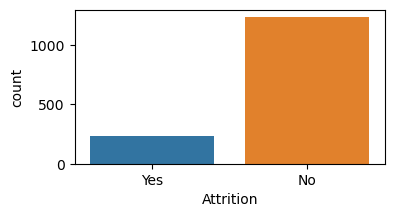

In [467]:
plt.figure(figsize=(4,2))
sns.countplot(df['Attrition']) 

In [468]:
# categorical_data=[]
# for col in df.columns :
#     if df[col].dtypes=='object':
#         categorical_data.append(col)
# print(categorical_data)      # list    
# print("\nNo of COls:",len(categorical_data) )

In [469]:
# cate_data=df[['Attrition', 'BusinessTravel', 'Department', 'Gender',  
#               'MaritalStatus', 'OverTime','EducationField','JobRole']]

In [470]:
# plt.figure(figsize=(10,20))

# value=1
# for col in cate_data:
#     if value<=15:
#         ax = plt.subplot(6,3,value)
#         sns.histplot(x = cate_data[col], hue=df.Attrition)
#     value+=1
# plt.tight_layout()    
# plt.show()        

 # Impact of Categorical Data on Attrition

Travel rate of the company is less.
emp who travel rarely have more no.of attrition and non traveller have less count attrition.
emp who travel rarely or frequenetly have more chances of leaving company

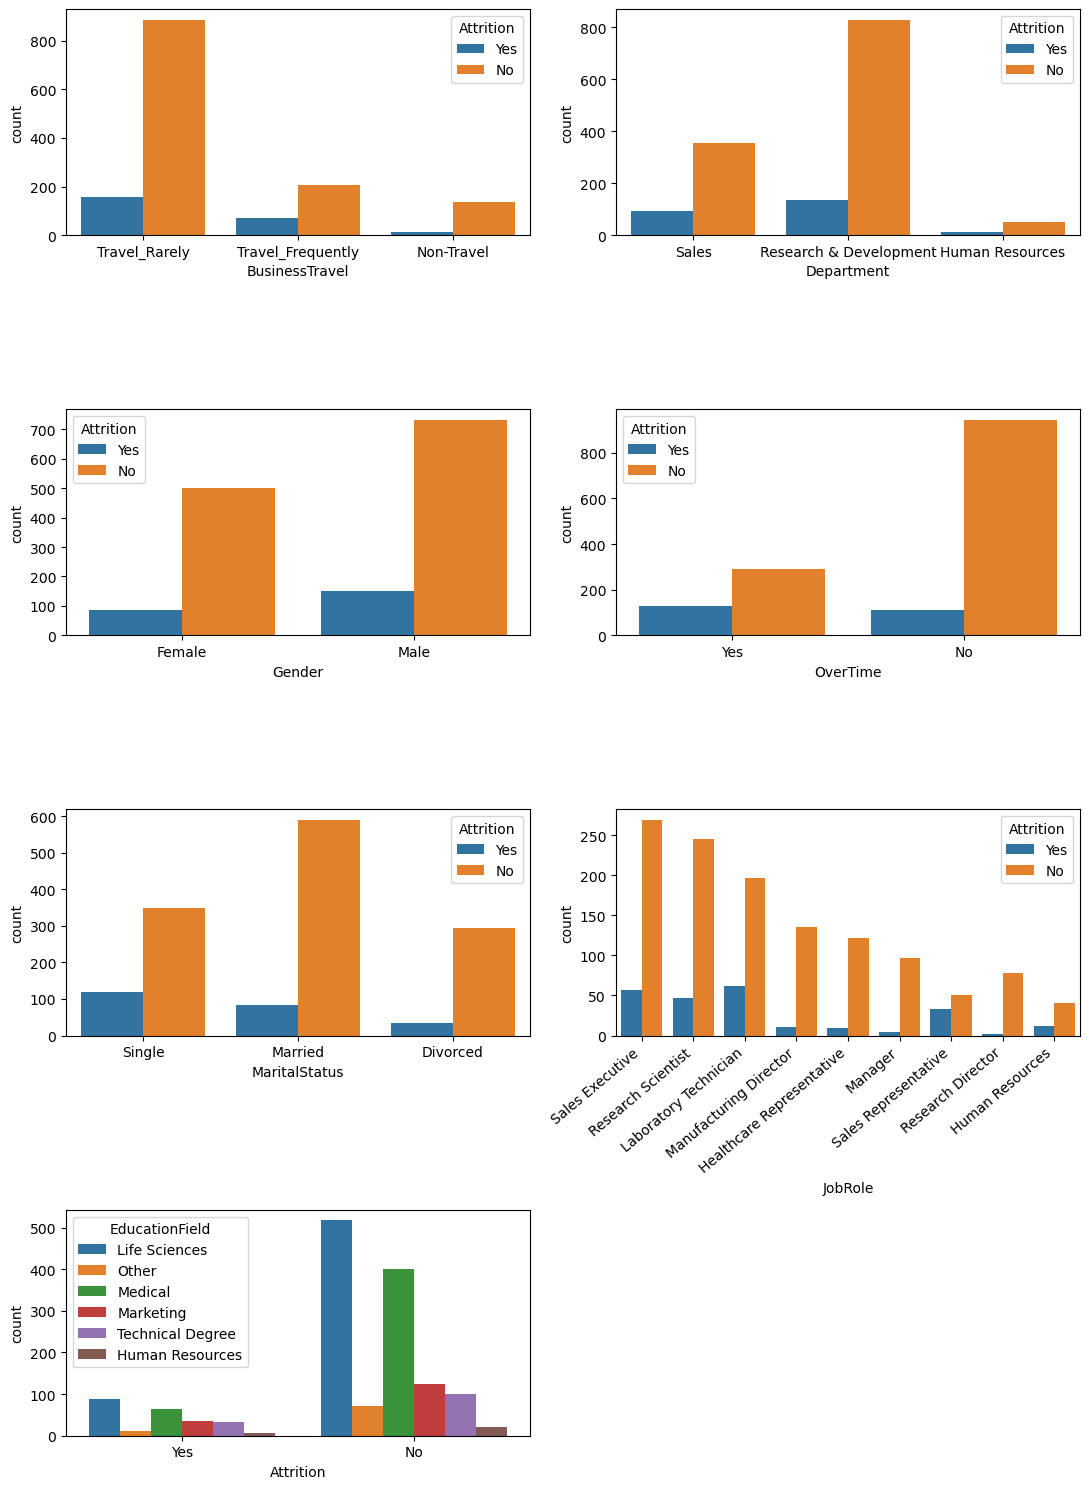

In [403]:
plt.figure(figsize=(11,15))

plt.subplot(4,2,1)
sns.countplot(df['BusinessTravel'],hue=df['Attrition'])

plt.subplot(4,2,2)
sns.countplot(df['Department'],hue=df['Attrition'])

plt.subplot(4,2,3)
sns.countplot(df['Gender'],hue=df['Attrition']) # not much impact of  gender on attrition

plt.subplot(4,2,4)
sns.countplot(x=df['OverTime'],hue=df['Attrition'])

plt.subplot(4,2,5)
sns.countplot(x=df['MaritalStatus'],hue=df['Attrition'])

plt.subplot(4,2,6)
ax = sns.countplot(x=df['JobRole'],hue=df['Attrition'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10)

plt.subplot(4,2,7)
sns.countplot(df['Attrition'],hue=df['EducationField'])


plt.tight_layout() #automatically adjusts subplot
plt.show()

In [404]:
#ax = sns.countplot(x=df['JobRole'],hue=df['Attrition'])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=14)
#plt.xlabel('JobRole',fontsize=18)

# 2) Analysis on Continuous Data wrt Target Column

In [471]:
continuous_data=[]
for col in df.columns :
    if df[col].dtypes=='int64' and len(df[col].unique())>=10:
        continuous_data.append(col)
print(continuous_data)      # list    
print("\nNo of COls:",len(continuous_data) )

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

No of COls: 12


In [406]:
data=df[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
         'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
data.head(2)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,8,11,8,6,4,0,5
1,49,279,8,61,5130,1,23,10,10,7,1,7


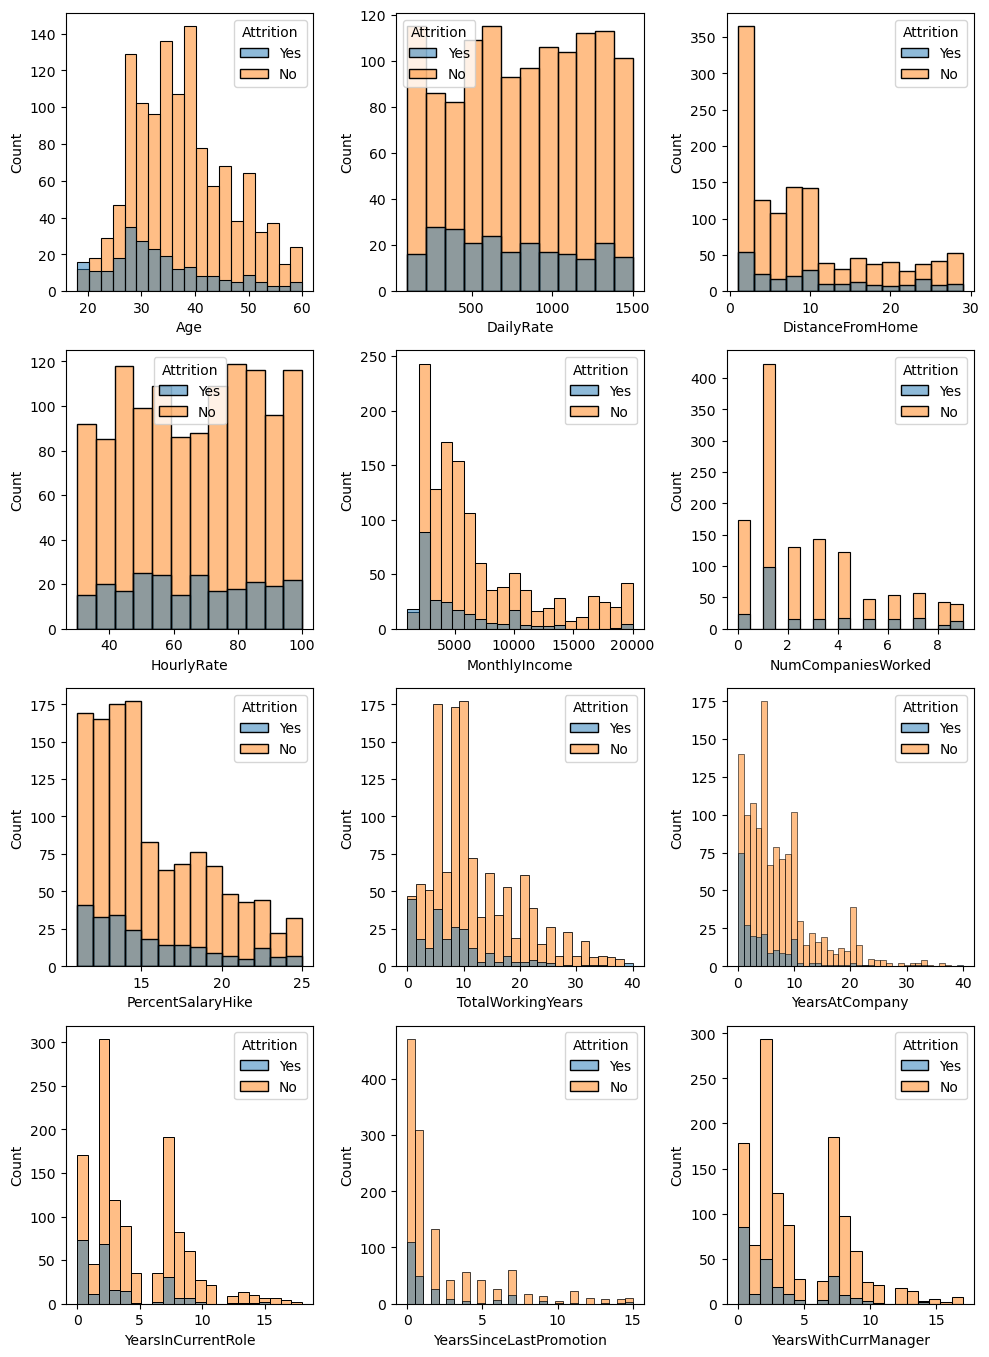

In [477]:
plt.figure(figsize=(10,20))

value=1
for col in data:
    if value<=12:
        ax = plt.subplot(6,3,value)
        sns.histplot(x = data[col], hue=df.Attrition)
    value+=1
plt.tight_layout()    
plt.show()        

# 3) Analysis on Discrete Data wrt Target Column

In [480]:
discrete_data=[]
for col in df.columns :
    if df[col].dtypes=='int64' and len(df[col].unique())<10:
        discrete_data.append(col)
print(discrete_data)      # list    
print("\nNo of COls:",len(discrete_data) )

['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

No of COls: 10


In [481]:
data2=df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
         'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']]


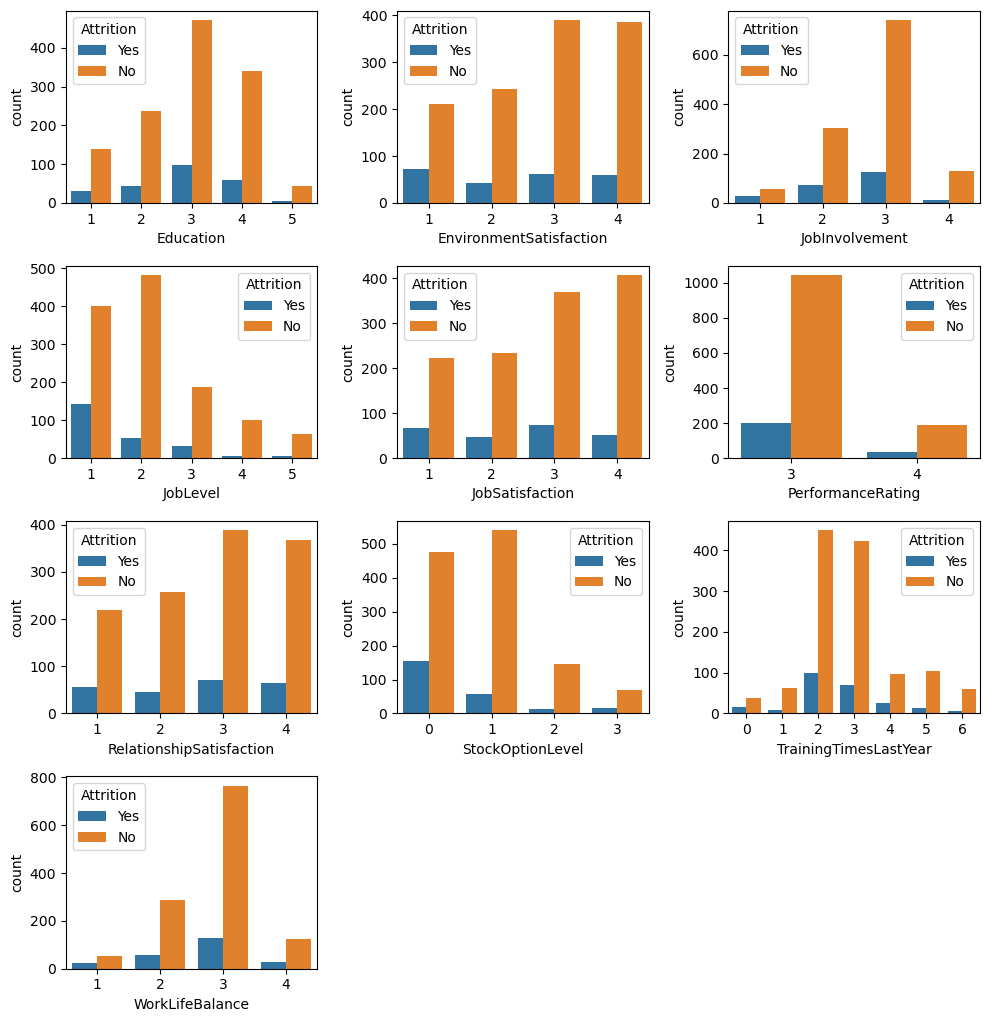

In [482]:
plt.figure(figsize=(10,15))

value=1
for col in data2:
    if value<=10:
        ax = plt.subplot(6,3,value)
        sns.countplot(x = data2[col], hue=df.Attrition)
    value+=1
plt.tight_layout()    
plt.show()        

# Binning :

In [418]:
x=min(df['MonthlyIncome'])
y=max(df['MonthlyIncome'])
print(x)
print(y)

1009
19999


In [494]:
group_name=['Low','Medium','High']
bins=np.linspace(x,y,4)
df['MonthlyIncomeBin']=pd.cut(df['MonthlyIncome'],bins,labels=group_name,include_lowest=True)

df[['MonthlyIncome','MonthlyIncomeBin']].head(3)

,MonthlyIncome,MonthlyIncomeBin
0,5993,Low
1,5130,Low
2,2090,Low


<AxesSubplot:xlabel='MonthlyIncomeBin', ylabel='count'>

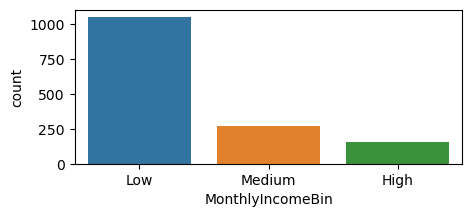

In [495]:
plt.figure(figsize=(5,2))
sns.countplot(df['MonthlyIncomeBin'])

In [496]:
df.MonthlyIncomeBin.value_counts()

Low       1048
Medium     267
High       155
Name: MonthlyIncomeBin, dtype: int64

# Count of  Employee  with Low Income

In [500]:
a=df[df['MonthlyIncomeBin']=='Low'] 
len(a)

1048

In [423]:
a.Department.value_counts()

Research & Development    708
Sales                     294
Human Resources            46
Name: Department, dtype: int64

In [424]:
a.Department.value_counts().sum()

1048

# Count Of  Employee who are from Research & Development department , have low monhtlyIncome and left the company

In [427]:
len(df[(df.Attrition=='Yes') & (df['MonthlyIncomeBin']=='Low')&(df.Department=='Research & Development')])

116

In [428]:
newdf=df[df['Attrition']=='Yes']
newdf.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeBin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Low
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Low
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,2,1,Laboratory Technician,3,Single,2028,5,Yes,14,3,2,0,6,4,3,4,2,0,3,Low


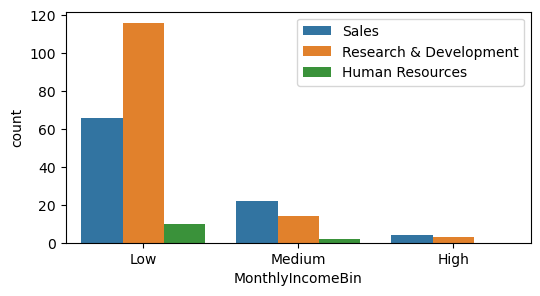

In [429]:
plt.figure(figsize=(6,3))
sns.countplot(x='MonthlyIncomeBin',hue='Department',data=newdf)
plt.legend(loc='upper right')